<a href="https://colab.research.google.com/github/sanjaykumar545/RoadSafe-Analytics/blob/main/milestone1/week1/day6/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
ds=pd.read_csv('/content/drive/My Drive/Infosys Internship/US_Accidents_March23.csv')

In [ ]:
ds.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
ds.dtypes

,0
ID,object
Source,object
Severity,int64
Start_Time,object
End_Time,object
Start_Lat,float64
Start_Lng,float64
End_Lat,float64
End_Lng,float64
Distance(mi),float64


Q1. How many unique values are there in categorical columns like City, State, and Weather_Condition? Which category is the most frequent in each?

In [ ]:
print("Unique Cities:", ds['City'].nunique())
print("Unique States:", ds['State'].nunique())
print("Unique Weather:", ds['Weather_Condition'].nunique())
print("Most Frequent count of Cities in column:",ds['City'].mode())
print("Most Frequent count of States in column:",ds['State'].mode())
print("Most Frequent count of Weather in column:",ds['Weather_Condition'].mode())

Unique Cities: 13678
Unique States: 49
Unique Weather: 144
Most Frequent count of Cities in column: 0    Miami
Name: City, dtype: object
Most Frequent count of States in column: 0    CA
Name: State, dtype: object
Most Frequent count of Weather in column: 0    Fair
Name: Weather_Condition, dtype: object


Q2. Calculate the percentage of missing values in each column and list columns with more than 5% missing data.

In [ ]:
missing=ds.isnull().sum()
miss_percent=(missing/len(ds)*100)
miss_ALL=pd.DataFrame({
    'missing count': missing,
    'percent':miss_percent
})
print("Missing value in each column : \n")
miss_ALL=miss_ALL[miss_ALL['missing count']!=0]
print(miss_ALL)
miss_ALL=miss_ALL[miss_ALL['percent']>=5]
print("\nColumn with more than 5% missing data : \n")
print(miss_ALL)

Missing value in each column : 

                       missing count    percent
End_Lat                      3402762  44.029355
End_Lng                      3402762  44.029355
Description                        5   0.000065
Street                         10869   0.140637
City                             253   0.003274
Zipcode                         1915   0.024779
Timezone                        7808   0.101030
Airport_Code                   22635   0.292881
Weather_Timestamp             120228   1.555666
Temperature(F)                163853   2.120143
Wind_Chill(F)                1999019  25.865904
Humidity(%)                   174144   2.253301
Pressure(in)                  140679   1.820288
Visibility(mi)                177098   2.291524
Wind_Direction                175206   2.267043
Wind_Speed(mph)               571233   7.391355
Precipitation(in)            2203586  28.512858
Weather_Condition             173459   2.244438
Sunrise_Sunset                 23246   0.300787
Civil_T

Q3. Convert Start_Time and End_Time columns to datetime objects. Find the range (earliest and latest) of accident start times in the dataset.


In [ ]:
ds['Start_Time']=pd.to_datetime(ds['Start_Time'],errors='coerce')
ds['End_Time']=pd.to_datetime(ds['End_Time'],errors='coerce')
print("Start_Time : ",ds['Start_Time'].dtypes)
print("End_TIme : ",ds['Start_Time'].dtypes)
print("Earliest Time : ",ds['Start_Time'].min())
print("Latest Time : ",ds['Start_Time'].max())

Start_Time :  datetime64[ns]
End_TIme :  datetime64[ns]
Earliest Time :  2016-01-14 20:18:33
Latest Time :  2023-03-31 23:30:00


Q4. Identify any duplicate records in the dataset based on all columns. How many duplicates exist and how will you handle them?

In [ ]:
dupli=ds.duplicated()
print(dupli.sum())
# using ds = ds.drop_duplicates() to remove the duplicates

7728393


Q5. Explore the distribution of accident severity (Severity column). What percentage of accidents belong to each severity level? Visualize this distribution with a pie chart.


Accident Severity Distribution:
Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64


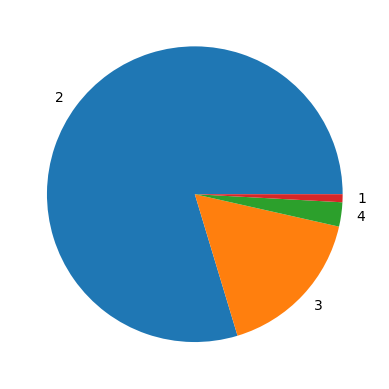

In [ ]:
print("\nAccident Severity Distribution:")
print(ds['Severity'].value_counts())
percent=ds['Severity'].value_counts()/len(ds)*100
plt.pie(percent,labels=percent.index)
plt.show()
